# Random Forests

**Random Forests** são um método de **ensemble learning** para classificação, regressão e outras tarefas que operam construindo uma infinidade de árvores de decisão no momento do treinamento e gerando a classe que é a moda das classes (classificação) ou previsão média (regressão) das árvores individuais.

Mais detalhes no [Wikipedia](https://en.wikipedia.org/wiki/Random_forest)

## Dados

Vamos utilizar o **banknote authentication Data Set**.

Os dados foram extraídos de imagens tiradas de espécimes semelhantes a notas falsas e genuínas. Para digitalização, uma câmera industrial normalmente usada para inspeção de impressão foi usada. As imagens finais têm 400x 400 pixels. Devido à lente do objeto e à distância do objeto investigado, foram obtidas imagens em escala de cinza com resolução de cerca de 660 dpi. A ferramenta Wavelet Transform foi usada para extrair recursos de imagens.

Mais detalhes sobre os dados podem ser encontrados em: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

Iniciamos importando as bibliotecas necessárias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregamos os dados em um **DataFrame** pandas e observamos as primeiras entradas.

In [2]:
df = pd.read_csv('dados/data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Temos 4 **features** e duas classes: 0 indicando uma nota falsa e 1 indicando uma nota verdadeira.

Agora podemos executar uma simples visualização com um **pairplot**.

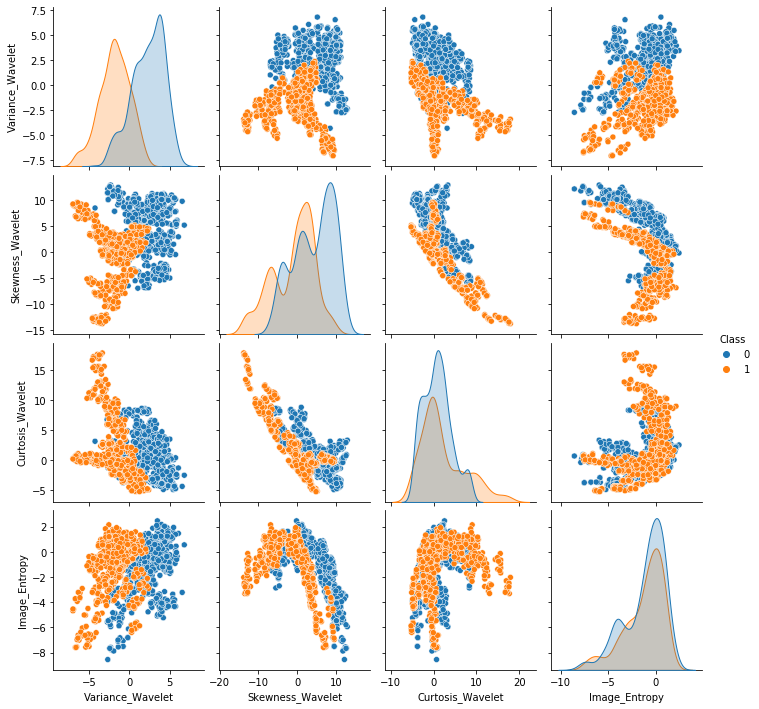

In [3]:
sns.pairplot(df, hue='Class');

Vamos agora construir nossas **features** (X) e **labels** (y).

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

E então podemos dividir os dados em conjuntos de treinamento e teste.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## Machine Learning

Usaremos o método **GridSearchCV** para encontrar os melhores hiperparâmetros para o nosso estimador.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Vamos então definir nossa grid de hiperparâmetros.

In [12]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,}

E então instanciamos o nosso modelo/estimador **RandomForestClassifier**.

In [13]:
rfc = RandomForestClassifier()

Também devemos instanciar o **GridSearchCV**.

In [14]:
grid = GridSearchCV(rfc, param_grid, verbose=True)

E ajustamos os dados.

In [15]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

Podemos agora ver os melhors parâmetros.

In [16]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 100}

Novamente vamos construir o nosso modelo com os melhores hiperparâmetros, também definiremos `oob_score = True`.

In [17]:
rfc = RandomForestClassifier(max_features=3, n_estimators=100, oob_score=True)

E então treinamos o modelo.

In [18]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

Agora podemos fazer previsões com o modelo treinado.

In [19]:
predictions = rfc.predict(X_test)

In [20]:
predictions[:10]

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [21]:
y_test[:10]

847     1
1172    1
815     1
152     0
33      0
347     0
1279    1
1353    1
82      0
339     0
Name: Class, dtype: int64

Uma vez que temos previsões feitas pelo nossso modelo, podemos medir o seu desempenho com o **classification_report** e a **matriz de confusão**.

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       113
           1       1.00      0.98      0.99        93

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



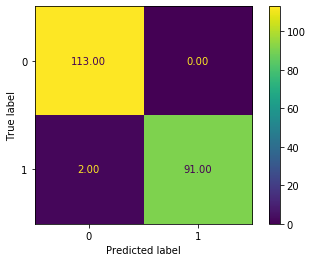

In [27]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, X_test, y_test, values_format = '.2f');

Como podemos ver, nosso modelo cometeu apenas dois erros.

Vamos agora testar diferentes valores de **n_estimators** para o nosso modelo e analisar o seu desempenho.

In [28]:
from sklearn.metrics import accuracy_score

errors = []
miss_classifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=3)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    miss_classifications.append(n_missed)

Agora vamos plotar o **Erro** vs **n_estimators**.

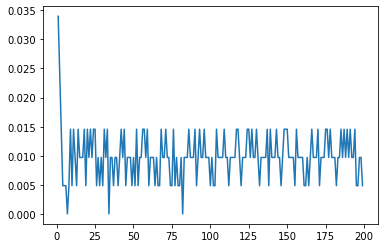

In [29]:
plt.plot(range(1,200),errors);

Agora vamos plotar o **Classificações Erradas** vs **n_estimators**.

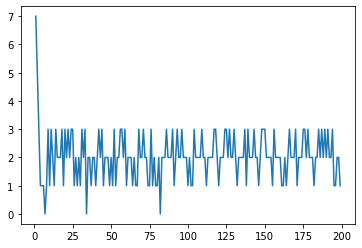

In [30]:
plt.plot(range(1,200), miss_classifications);

Podemos observar que chega um momento que adicionar mais árvores não altera o nosso desempenho.